# Dependancies

In [ ]:
!pip install pandas==0.24.2
!pip install --user pandas_ml==0.6.1
#downgrade matplotlib to bypass issue with confusion matrix being chopped out
!pip install matplotlib==3.1.0
!pip install seaborn
!pip install pydot

     |██████▊                         | 2.1MB 5.8MB/s eta 0:00:02

In [94]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score

import pandas as pd, numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.tree import export_graphviz

In [95]:
def model_metrics(regressor,y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared error: %.2f"
      % mse)
    r2 = r2_score(y_test, y_pred)
    print('R2 score: %.2f' % r2 )
    return [mse, r2]
def two_d_compare(X_test,y_test,y_pred,model_name):
    area = (12 * np.random.rand(40))**2 
    plt.subplots(ncols=2, figsize=(10,4))
    plt.suptitle('Actual vs Predicted data : ' +model_name + '. Variance score: %.2f' % r2_score(y_test, y_pred))

    plt.subplot(121)
    plt.scatter(X_test, y_test, alpha=0.8, color='#8CCB9B')
    plt.title('Actual')

    plt.subplot(122)
    plt.scatter(X_test, y_pred, alpha=0.8, color='#E5E88B')
    plt.title('Predicted')

    plt.show()

In [96]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e69b82b59899402e8b055d68a4476d94 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='3Db9n8D3sB90I2UamtHg3ae7-8ZQHhag6H8AyohIeClC',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_e69b82b59899402e8b055d68a4476d94.get_object(Bucket='lifeexpectancyregressionmodel-donotdelete-pr-hhyqizxfehzemk',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_pd = pd.read_csv(body)
df_pd.columns


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# Preprocessing

In [97]:
index = df_pd.loc[df_pd['Life expectancy '].isnull()]
df_pd = df_pd.drop(index.index)
df_pd = df_pd.fillna(df_pd.mean())
df_pd.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [98]:
categoricalColumns = df_pd.select_dtypes(include=[np.object]).columns

print("Categorical columns : " )
print(categoricalColumns)

impute_categorical = SimpleImputer(strategy="most_frequent")
onehot_categorical =  OneHotEncoder(handle_unknown='ignore')

categorical_transformer = Pipeline(steps=[('impute',impute_categorical),('onehot',onehot_categorical)])

Categorical columns : 
Index(['Country', 'Status'], dtype='object')


In [99]:
numericalColumns = ['Adult Mortality',' BMI ',' HIV/AIDS','GDP',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling']
print("Numerical columns : " )
print(numericalColumns)

scaler_numerical = StandardScaler()

numerical_transformer = Pipeline(steps=[('scale',scaler_numerical)])

Numerical columns : 
['Adult Mortality', ' BMI ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [100]:
preprocessorForAllColumns = ColumnTransformer(transformers=[('num',numerical_transformer,numericalColumns)],
                                            remainder="passthrough")

In [101]:
from sklearn.impute import SimpleImputer

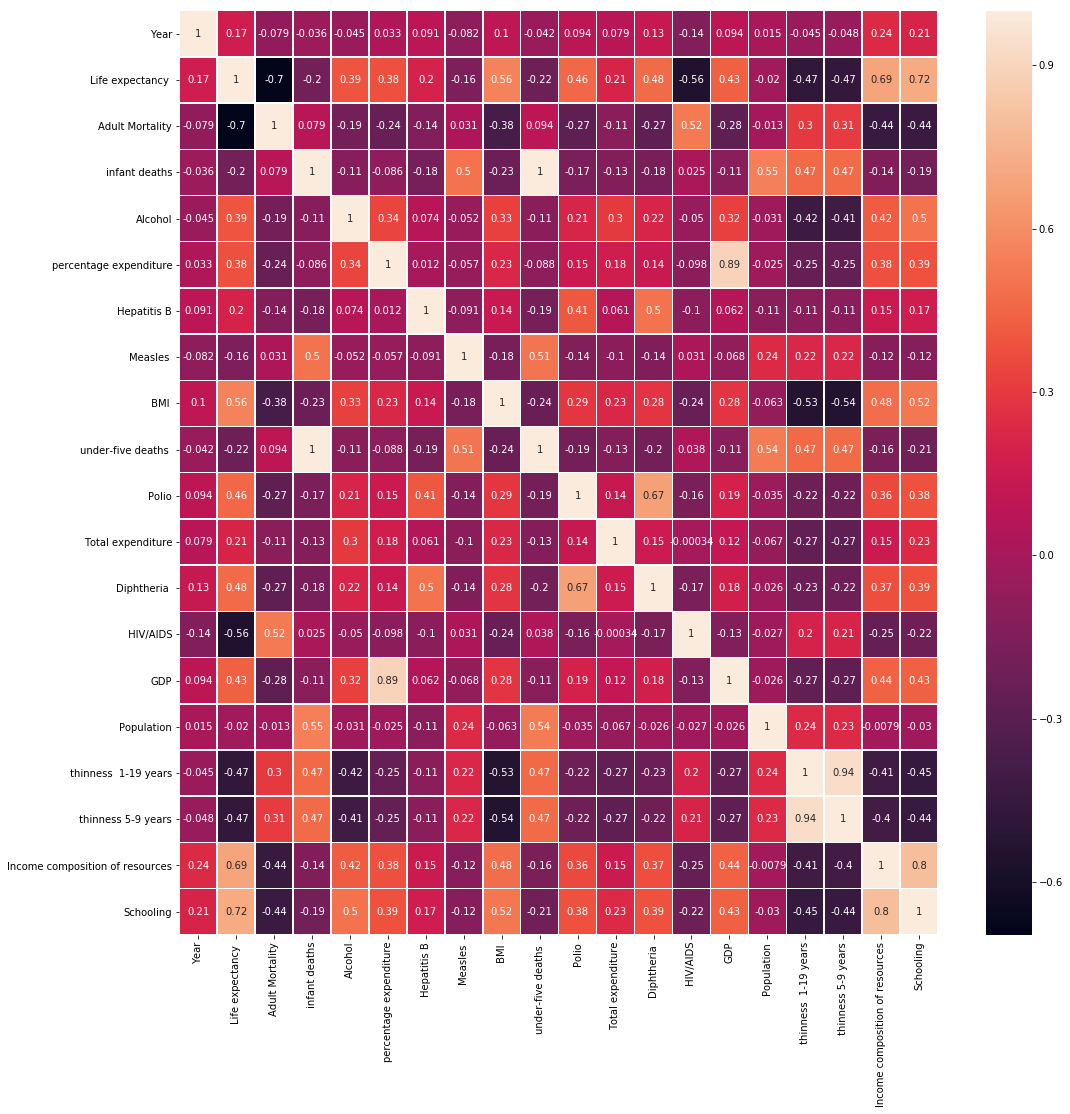

In [102]:
fig, ax = plt.subplots(figsize=(17,17))

sns.heatmap(df_pd.corr(), annot = True,linewidths=.5,ax=ax)

# Splitting into Train and Test

In [103]:
features = df_pd[['Adult Mortality',' BMI ',' HIV/AIDS','GDP',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling']]

label = df_pd['Life expectancy ']

#print(" value of label : " + str(label))

print(features.isnull().sum())
#features.head()

X_train, X_test, y_train, y_test = train_test_split(features,label , random_state=0)

Adult Mortality                    0
 BMI                               0
 HIV/AIDS                          0
GDP                                0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [104]:
# print(X_train.isnull().sum())
# imp.fit_transform(X_test)
# imp.fit_transform(X_train)
# print(X_train.isnull().sum())
X_train.head()

,Adult Mortality,BMI,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1364,258.0,2.7,3.0,1229.114798,7.9,7.7,0.541,11.1
898,188.0,62.7,0.1,4921.896290,4.0,3.7,0.734,15.3
1906,49.0,17.8,5.3,459.457212,13.8,13.8,0.000,7.7
390,152.0,62.1,0.1,6955.987733,2.0,2.1,0.768,13.8
1295,72.0,56.4,0.1,22196.573600,0.5,0.5,0.836,15.2


In [105]:
# from sklearn.linear_model import LinearRegression

# mlRegressor = LinearRegression()

# #mlr_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('regressor', mlRegressor)])

# mlr_model.fit(X_train,y_train)

# y_pred_mlr= mlr_model.predict(X_test)

# two_d_compare(X_test['Adult Mortality'],y_test,y_pred_mlr,"Regression")

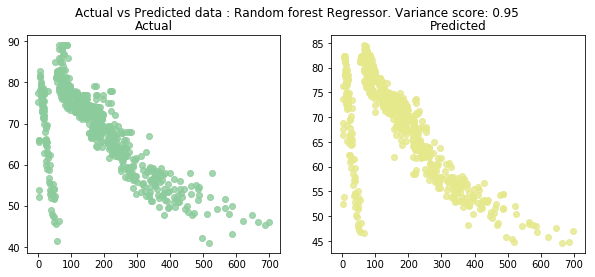

In [146]:
from sklearn.ensemble import RandomForestRegressor

model_name = "Random Forest Regressor"

randomForestRegressor = RandomForestRegressor(n_estimators=100, max_depth=15,random_state=0)
rfr_model = Pipeline(steps=[('regressor', randomForestRegressor)]) 
rfr_model.fit(X_train,y_train)

y_pred_rfr = rfr_model.predict(X_test)

two_d_compare(X_test['Adult Mortality'],y_test,y_pred_rfr,"Random forest Regressor")

In [147]:
X_test.head()

,Adult Mortality,BMI,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2225,217.0,24.7,1.2,894.927988,6.7,6.6,0.527,10.3
838,344.0,22.6,7.7,21451.886170,8.9,8.8,0.580,9.2
2405,485.0,42.2,28.9,3775.682750,13.5,16.1,0.613,12.9
1969,122.0,5.3,0.1,4916.548860,2.1,2.1,0.740,12.9
305,189.0,51.9,0.1,7494.210719,1.2,1.1,0.666,13.8


In [148]:
y_pred_rfr

array([64.33606315, 56.27958844, 54.388     , 75.01044168, 72.86016667,
       73.48765768, 57.82382143, 61.05169526, 70.05691879, 74.08199045,
       73.45867234, 73.73556215, 70.7007027 , 73.14327672, 76.95453575,
       63.52674567, 73.95759324, 62.08711429, 56.91512381, 68.9606369 ,
       72.40524515, 62.7926605 , 77.0668    , 64.82985714, 75.79299619,
       73.74604708, 57.05514603, 69.5112    , 73.44907984, 52.96797619,
       67.59260872, 83.96463916, 72.41651937, 64.61285714, 53.49336667,
       67.85552433, 53.72008548, 74.59157378, 74.85831442, 73.08661032,
       52.21059048, 73.70510933, 79.3477    , 57.83693095, 74.30720106,
       74.90924097, 73.37974605, 48.165     , 79.60550952, 74.36103958,
       82.41806223, 66.6739619 , 77.21187656, 62.27381667, 59.58116404,
       81.93257118, 66.426     , 72.476     , 55.49658333, 66.24476254,
       79.88551219, 82.14666674, 47.858     , 74.51269242, 75.04770199,
       52.8776881 , 53.92671667, 72.53562882, 56.79491515, 81.13

In [149]:
# from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [9]:
# @hidden_cell
wml_credentials={
  "apikey": "***********************************",
  "instance_id": "***********************************",
  "password": "57b62be0-9add-4e3d-9ce9-9667b47fbe68",
  "url": "https://eu-gb.ml.cloud.ibm.com",
  "username": "91ab6b2d-f1d7-4240-a523-9d2bd106d70e"
}

In [151]:
# client = WatsonMachineLearningAPIClient( wml_credentials )

In [152]:
# model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Smit", 
#                client.repository.ModelMetaNames.AUTHOR_EMAIL: "smit37patel@gmail.com", 
#                client.repository.ModelMetaNames.NAME: "LifeExpectancy"}

In [153]:
# model_artifact =client.repository.store_model(randomForestRegressor, meta_props=model_props)

In [154]:
# published_model_uid = client.repository.get_model_uid(model_artifact)

In [3]:
# published_model_uid

In [2]:
# deployment = client.deployments.create(published_model_uid, name="LifeExpectancy")

In [157]:
# scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [7]:
#scoring_endpoint